In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [22]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

GeForce GTX 970
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import pickle


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from src.models import gan, wgangp#, aae  # , vae
 
from src.common.helperfunctions import *
from src.common.accuracy_XGboost import *


import xgboost as xgb
import time
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'data/raw/creditcard.csv'
df = pd.read_csv(file_name)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [4]:
train.shape

(227845, 31)

In [5]:
sc = StandardScaler()
train.loc[:,'Amount'] = sc.fit_transform(train.Amount.values.reshape(-1, 1))
test.loc[:,'Amount'] = sc.transform(test.Amount.values.reshape(-1, 1))
train.drop('Time',axis=1, inplace=True)
test.drop('Time', axis=1, inplace=True)

/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [6]:
train_Class = train[train.Class == 1]

In [7]:
train_Class.drop('Class', axis = 1,inplace=True)

In [8]:
train_Class.shape

(394, 29)

In [9]:
label_col = []
feature_cols = []
label_col = [i for i in train.columns if 'Class' in i]
feature_cols = [i for i in train.columns if i not in label_col]

# Train GAN

In [10]:
train_Class.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
device =

SyntaxError: invalid syntax (<ipython-input-11-c86aa6f06fd4>, line 1)

In [11]:
dataloader = prepareDataset(train_Class, batch_size = 64, device = 'cpu', withLabel = False)

In [12]:
dataloader.dataset.features.size()

torch.Size([394, 29])

In [15]:
xgblosses, G_losses, D_losses = wgangp.train(dataloader, randomNoise_dim = 29, hidden_dim = 64, realData_dim =dataloader.dataset.features.size(1), lr = 0.002, num_epochs=1500, device='cpu')

Starting Training Loop...
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
epoch: 0, Accuracy: 0.9974619289340102
[0/1501][6/7]	Loss_C: 6.5169	Loss_G: 0.0343	
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([64, 29])
torch.Size([10, 29])
torch.Si

In [16]:
xgblosses

array([0.99746193, 1.        , 0.99746193, 0.99492386, 0.99238579,
       1.        , 0.99746193, 1.        , 1.        , 0.99238579,
       0.98984772, 0.99746193, 0.99746193, 0.99746193, 0.99238579,
       0.99746193, 0.99746193, 0.99746193, 0.98730964, 0.99492386,
       0.99746193, 0.99492386, 0.97461929, 0.99238579, 0.99492386,
       0.99746193, 0.99746193, 0.98984772, 0.96700508, 0.98477157,
       0.98984772, 0.9822335 , 0.99492386, 0.99746193, 0.98730964,
       0.99492386, 1.        , 0.99746193, 0.97461929, 0.9822335 ,
       0.97461929, 0.98730964, 0.97715736, 1.        , 0.99746193,
       0.98984772, 0.98477157, 0.9822335 , 0.99492386, 0.99492386,
       0.98730964, 0.99238579, 0.97969543, 0.98984772, 0.99238579,
       0.98730964, 1.        , 0.99238579, 0.99238579, 0.99746193,
       0.99746193, 0.98984772, 0.9822335 , 0.99238579, 0.99492386,
       0.99238579, 0.99492386, 0.99746193, 0.99492386, 0.99746193,
       0.99238579, 0.99492386, 0.99746193, 1.        , 1.     

In [19]:
number = 0.68020305

In [20]:
for i in range(xgblosses.size):
    if np.round(xgblosses[i],8) == number:
        print(i*10)

720


0.9670050761421319


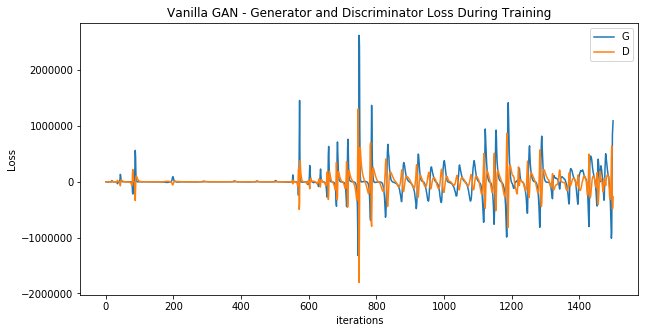

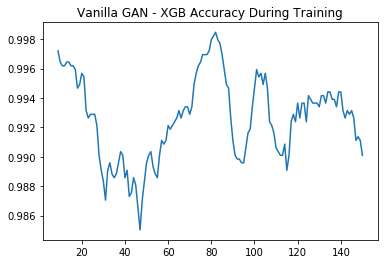

In [17]:
print(min(xgblosses))
plt.figure(figsize=(10,5))
plt.title(f"Vanilla GAN - Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f'reports/figures/gan/GAN.png')
plt.show()

w = 10
a = pd.DataFrame(xgblosses[:]).rolling(w).mean()
plt.title(f"Vanilla GAN - XGB Accuracy During Training")
plt.plot(a)
plt.savefig(f'reports/figures/gan/xgblosses_GAN.png')
plt.show()

In [21]:
amount=train_X.shape[0]
device='cpu'

In [22]:
randomNoise_dim = 29; hidden_dim = 64; realData_dim =df.dataset.features.size(1)

In [23]:
more_data = gan.generate_data(720, randomNoise_dim, hidden_dim, realData_dim, amount, 'cpu')

In [24]:
more_data = more_data.detach().numpy()

In [25]:
b = np.ones((more_data.shape[0],more_data.shape[1]+1))
b[:,:-1] = more_data

In [26]:
b

array([[-3.74648833e+00,  1.67158341e+00, -3.32639575e+00, ...,
        -1.74524382e-01,  8.49631271e+01,  1.00000000e+00],
       [-5.65757990e+00,  4.23543978e+00, -9.08534813e+00, ...,
        -8.24903190e-01,  4.51143280e+02,  1.00000000e+00],
       [-4.19404316e+00,  3.48470283e+00, -6.79983711e+00, ...,
         4.14556623e-01,  7.45879769e-01,  1.00000000e+00],
       ...,
       [-2.80120587e+00,  3.59284377e+00, -4.07865429e+00, ...,
        -5.41586220e-01,  4.42966156e+02,  1.00000000e+00],
       [-2.23116159e+00,  2.35997701e+00, -3.54712534e+00, ...,
        -1.88884273e-01,  2.06392456e+02,  1.00000000e+00],
       [-1.16502943e+01,  6.12453222e+00, -1.40727768e+01, ...,
        -3.23651254e-01,  2.28655930e+01,  1.00000000e+00]])

In [27]:
df_generatedData = pd.DataFrame(b, columns = feature_cols + label_col)
df_generatedData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-3.746488,1.671583,-3.326396,1.300700,-2.239374,-0.522375,-3.305003,0.872262,-1.570905,-4.529001,...,0.304583,0.651947,-0.166428,-0.070164,0.435700,0.085980,0.232742,-0.174524,84.963127,1.0
1,-5.657580,4.235440,-9.085348,5.152085,-8.096600,0.611667,-6.766641,2.330878,-2.725926,-8.237358,...,0.732509,1.698818,-0.145588,-0.266639,0.767018,0.817795,1.105154,-0.824903,451.143280,1.0
2,-4.194043,3.484703,-6.799837,3.915308,-4.308702,-1.649575,-8.820753,2.549461,-3.406720,-10.455271,...,1.517537,0.258504,0.178004,-0.457906,-0.229811,0.010223,1.706122,0.414557,0.745880,1.0
3,-3.151664,1.525101,-0.984689,4.935404,1.641620,-0.441148,-2.102955,0.356041,-3.197555,-2.311007,...,0.263501,-0.790250,-0.732062,-0.251963,-0.372670,0.546962,0.730577,0.019122,2.063379,1.0
4,-10.795351,6.751608,-19.413870,9.554858,-10.647628,-3.282837,-19.627871,6.974954,-4.369109,-17.993092,...,1.930022,0.669329,0.010475,-0.500988,-0.570860,0.324086,0.301991,0.039855,5.600980,1.0


In [28]:
train.shape

(227845, 30)

In [29]:
train = train.append(df_generatedData)

In [30]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [31]:
train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
train_y = train.Class

In [33]:
train_y.isnull().sum()

0

In [34]:
train_X = train.drop('Class', axis=1, inplace=True)

# XGBoost

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
start_time = time.time()
dtrain = xgb.DMatrix(train_X, train_y, feature_names=feature_cols)
dtest = xgb.DMatrix(test_X, test_y, feature_names=feature_cols)

results_dict = {}

param = {
        'max_depth':5, 
        'eta':0.3, 
        'verbosity': 1, 
        'objective':'binary:logistic', 
        'eval_metric': 'auc', 
        'seed': 42
        }

model = xgb.train(param, dtrain, num_boost_round=20)
# make prediction
preds = model.predict(dtest)
elapsed_time = time.time() - start_time
print('Time elapsed to train: ', elapsed_time)

In [ ]:
preds = preds.round()

In [ ]:
print('---' * 45)
print('XGBoost ROC/AUC: {:.6f}'.format(roc_auc_score(test_y, preds)))
print('Recall Score: {:.6f}'.format(recall_score(test_y, preds)))
print('Precision Score: {:.6f}'.format(precision_score(test_y, preds)))
print('F1 Score: {:.6f}'.format(f1_score(test_y, preds)))
print('Accuracy Score: {:.6f}'.format(accuracy_score(test_y, preds)))
print('---' * 45)